# WorldMet vs AEMET

Comparar los datos que se optienen mediante `worldmet` que proceden de [NOAA](https://www.noaa.gov/) con los que se obtienen desde la API de [AEMET](https://opendata.aemet.es/centrodedescargas/inicio). La variables que se obtienen mediante las distintas fuentes no son las mismas, por lo que la comparacion se realiza entre variables comunes. Para este caso se han escogido: _Velocidad del viento_, _temperatura_, _direccion del viento_, _precipitacion_, _radiacion_ y _Humedad_

Hay que tener en cuenta que mientras que `worldmet` te permite obtener los datos con resolucion horaria, AEMET solo te permite tener los datos diarios, por lo que se debera hacer la media diaria a los datos de `worldmet` para una correcta comparacion, aunque no se sabe el metodo utilizado por AEMET para obtener los datos diarios.

|     Variable      |  AEMET   | WorldMet |
|:-----------------:|:--------:|:--------:|
| Temperatura media |   tmed   | air_temp |
| Velocidad Viento  | velmedia |    ws    |
| Direccion viento  |   dir    |    wd    |
|  Precipitacion    |   prec   |  precip  |
|    Radiacion      |   sol    |    -     |
| Humedad Relativa  |    -     |    RH    |

In [1]:
setwd("~/Repositories/AirQualityCOVID")

source("src/general.R")

In [2]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [3]:
suppressMessages(library(worldmet))
suppressMessages(library(lubridate))
suppressMessages(library(tidyverse))

## Datos de WorldMet

In [4]:
variables.wmt <- c("air_temp", "ws", "wd", "precip")

In [5]:
dataMto <- importNOAA(code = "080210-99999",
                      year = 2013:2020,
                      hourly = TRUE,
                      n.cores = 6
                     )
head(dataMto)

code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,⋯,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_12,precip_6,precip,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
080210-99999,"SANTANDER, SP",2013-01-01 04:00:00,43.42706,-3.820006,4.87,8.7,280.0000,11.0,NA,⋯,NA,NA,4.0,1800,NA,NA,NA,NA,NA,NA
080210-99999,"SANTANDER, SP",2013-01-01 05:00:00,43.42706,-3.820006,4.87,8.0,276.1277,11.0,NA,⋯,4.0,NA,4.0,1650,1800,NA,NA,NA,NA,NA
080210-99999,"SANTANDER, SP",2013-01-01 06:00:00,43.42706,-3.820006,4.87,7.2,272.9441,12.2,1017.4,⋯,5.5,NA,5.5,1170,1560,NA,NA,NA,NA,NA
080210-99999,"SANTANDER, SP",2013-01-01 07:00:00,43.42706,-3.820006,4.87,5.1,265.0000,11.0,NA,⋯,7.0,NA,7.0,1050,1545,NA,NA,NA,NA,NA
080210-99999,"SANTANDER, SP",2013-01-01 08:00:00,43.42706,-3.820006,4.87,3.6,250.0000,11.0,NA,⋯,7.0,NA,7.0,900,1200,NA,NA,NA,NA,NA
080210-99999,"SANTANDER, SP",2013-01-01 09:00:00,43.42706,-3.820006,4.87,6.7,270.0000,11.5,1019.5,⋯,7.0,NA,7.0,975,1800,NA,NA,NA,3.333333,NA


In [41]:
dataMto$date <- as_date(floor_date(dataMto$date, unit="day"))

new.df <- aggregate(dataMto[, "air_temp"], 
                    by=list(date=dataMto$date), mean, na.rm=TRUE)

for (nm in c("ws", "atmos_pres", "precip")) {
    new.df <- merge(new.df,
                    aggregate(dataMto[,nm], 
                              by=list(date=dataMto$date), mean, na.rm=TRUE),
                    by = "date",
                    all.x = TRUE, all.y = TRUE
                   )
}


## Datos de AEMET

In [50]:
data.aemet <- read.csv("data/AEMET/prueba.csv")
data.aemet$fecha <- ymd(data.aemet$fecha)

head(data.aemet)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
,<date>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-12-31,1109,SANTANDER AEROPUERTO,CANTABRIA,3,7.4,0,3.2,23:59,11.5,16:15,23,0.6,6.1,18:20,6.9,1032.9,0,1029.2,24
2,2017-01-01,1109,SANTANDER AEROPUERTO,CANTABRIA,3,7.5,0,1.8,05:30,13.2,15:30,23,0.3,4.2,23:20,6.2,1029.2,0,1017.3,24
3,2017-01-02,1109,SANTANDER AEROPUERTO,CANTABRIA,3,8.7,0,4.0,02:10,13.4,-2,20,2.5,11.4,05:40,2.6,1022.3,-2,1016.3,4
4,2017-01-03,1109,SANTANDER AEROPUERTO,CANTABRIA,3,7.5,0,3.2,08:30,11.8,-2,99,1.4,7.2,-2,7.0,1028.0,-2,1022.0,0
5,2017-01-04,1109,SANTANDER AEROPUERTO,CANTABRIA,3,5.8,0,1.5,06:10,10.2,-2,6,0.6,5.6,14:01,1.3,1029.4,-2,1027.5,0
6,2017-01-05,1109,SANTANDER AEROPUERTO,CANTABRIA,3,6.6,0,2.0,08:10,11.2,14:10,8,3.6,9.7,11:30,7.2,1031.9,-2,1028.9,1


In [51]:
diff.df <- merge(new.df, 
                 data.aemet %>%
                     select(fecha, tmed, prec, velmedia), 
                 by.x="date", by.y="fecha", 
                 all.x=TRUE, all.y=TRUE)

#diff.df$diff <- (diff.df$x - diff.df$tmed)

In [52]:
head(diff.df)

,date,air_temp,ws,atmos_pres,precip,tmed,prec,velmedia
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-01,11.059649,5.5188596,1020.70,3.333333,11.8,5.8,NA
2,2013-01-02,10.467544,2.4236842,1031.96,0.000000,11.0,0.7,NA
3,2013-01-03,9.697368,2.2947368,1038.16,0.000000,9.9,0.0,NA
4,2013-01-04,7.994737,0.2657895,1038.04,0.000000,8.8,0.0,NA
5,2013-01-05,7.771053,0.7771930,1035.86,0.000000,7.2,0.0,NA
6,2013-01-06,9.155263,1.1710526,1031.24,0.000000,10.4,0.0,NA


## Representar ambos datasets

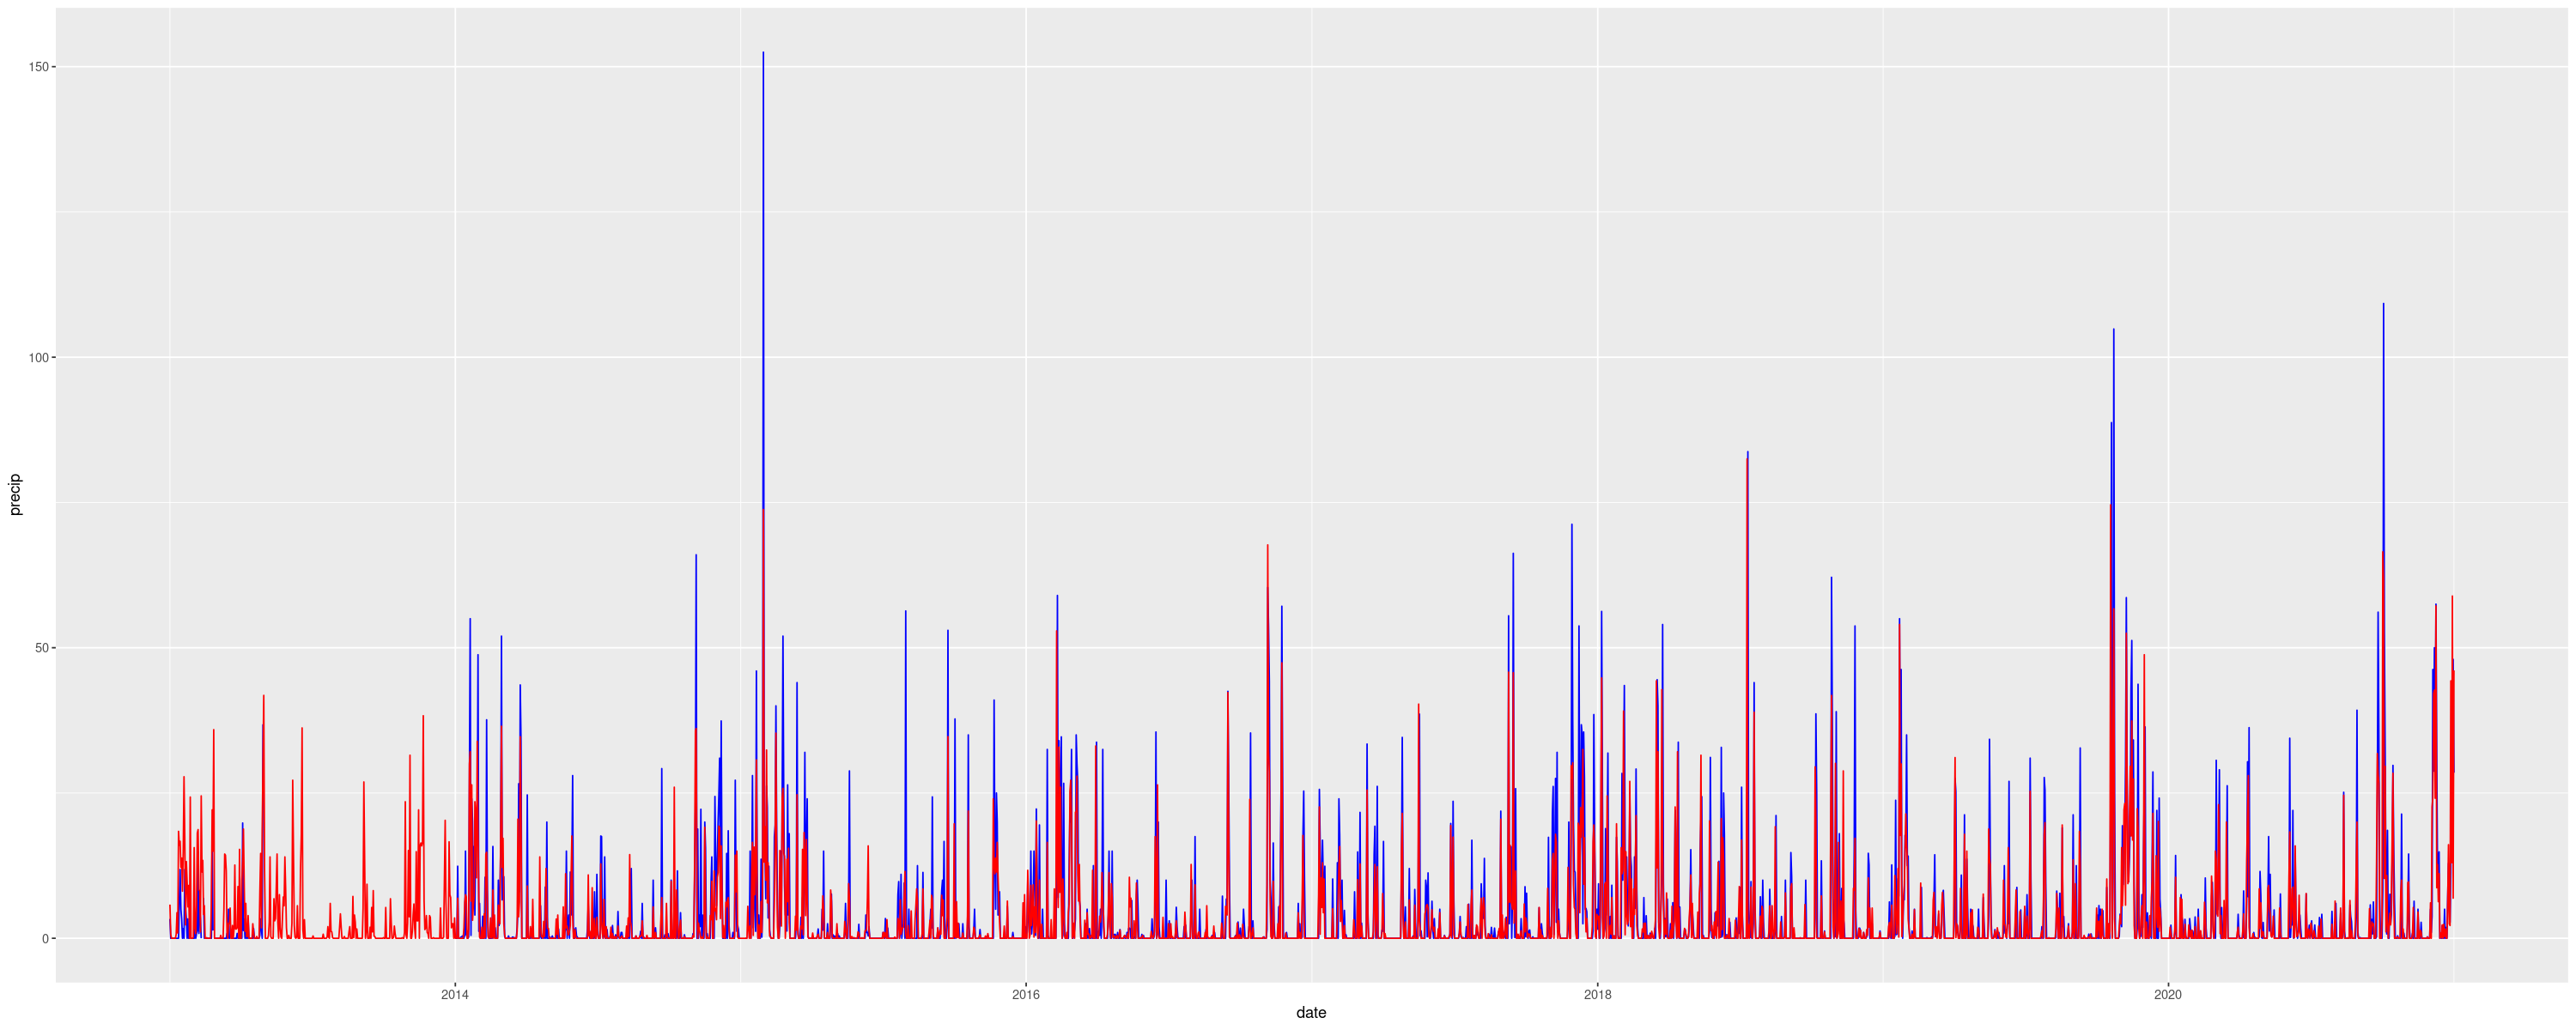

In [53]:
ggplot(data=diff.df) +
    geom_line(aes(x=date, y=precip), color="blue") +
    geom_line(aes(x=date, y=as.numeric(prec)), color="red")# +
    #geom_line(aes(x=date, y=diff+mean()), color="green")